# Most Popular Unisex Names

For this project, we will find the top 10 most common unisex names, and plot their popularity vs. year for both male and female versions. Note that a unisex name is defined as a name where $0.5 < \frac{\text{total number of boys}}{\text{total number of girls}} < 2$

From https://www.ssa.gov/oact/babynames/limits.html, we obtain the 'names.zip' file containing many .txt files for each year since 1880. 

In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

## Loading Baby Names:

In [2]:
# Load and unzip the file 'names.zip' 
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [3]:
# Concatenate all txt files into a single dataframe and create a new column "year"
# Result: dataframe with baby names for all years since 1880. 
names = pd.concat(pd.read_csv(f'yob{year}.txt', 
                                 names=['name','sex','number']).assign(year=year) 
                     for year in range(1880, 2024))

In [4]:
names

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31677,Zyell,M,5,2023
31678,Zyen,M,5,2023
31679,Zymirr,M,5,2023
31680,Zyquan,M,5,2023


In [5]:
names.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2117219 entries, 0 to 31681
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   number  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 80.8+ MB


In [6]:
names.year.min(), names.year.max()

(1880, 2023)

## Finding most popuar unisex names 

In [7]:
# total number across all years, grouped by sex and name
totals = names.groupby(['sex','name']).number.sum()

In [8]:
totals

sex  name     
F    Aabha        62
     Aabidah       5
     Aabriella    51
     Aada         13
     Aadaya        9
                  ..
M    Zyus         11
     Zyvion        5
     Zyvon         7
     Zyyon         6
     Zzyzx        10
Name: number, Length: 115164, dtype: int64

In [9]:
# split into male and female totals
male, female = totals.loc['M'], totals.loc['F']

In [10]:
male

name
Aaban     127
Aabid      16
Aabir      19
Aadam     343
Aadan     136
         ... 
Zyus       11
Zyvion      5
Zyvon       7
Zyyon       6
Zzyzx      10
Name: number, Length: 44261, dtype: int64

In [11]:
female

name
Aabha        62
Aabidah       5
Aabriella    51
Aada         13
Aadaya        9
             ..
Zyrielle     32
Zyrihanna    50
Zyriyah      16
Zyva         56
Zyyanna       6
Name: number, Length: 70903, dtype: int64

In [12]:
# compute ratio of male and female totals 
ratios = (totals.loc['M'] / totals.loc['F']).dropna()

In [13]:
ratios

name
Aaden      1011.200000
Aadi         67.375000
Aadyn        37.125000
Aalijah       1.906040
Aaliyah       0.001014
              ...     
Zyn           1.166667
Zyon          5.427557
Zyonn        18.800000
Zyree         8.125000
Zyrie         2.423077
Name: number, Length: 11600, dtype: float64

In [14]:
# recall that unisex names have ratios between 0.5 and 2
ratios[(ratios > 0.5) & (ratios < 2)]

name
Aalijah    1.906040
Aamari     1.678899
Aari       1.833333
Aaris      1.260870
Aaryn      0.545842
             ...   
Ziyan      1.385965
Zoah       0.565217
Zohar      0.562842
Zyian      1.000000
Zyn        1.166667
Name: number, Length: 1744, dtype: float64

In [15]:
# names that fit the unisex ratio constraint
unisex = ratios[(ratios > 0.5) & (ratios < 2)].index

In [16]:
unisex

Index(['Aalijah', 'Aamari', 'Aari', 'Aaris', 'Aaryn', 'Aavyn', 'Abey', 'Abrar',
       'Abriel', 'Adair',
       ...
       'Zi', 'Zihan', 'Zikora', 'Zior', 'Zixuan', 'Ziyan', 'Zoah', 'Zohar',
       'Zyian', 'Zyn'],
      dtype='object', name='name', length=1744)

In [17]:
# create array of top ten unisex counts, indexed by name
common = (male.loc[unisex] + female.loc[unisex]).sort_values(ascending=False).head(10)

In [18]:
common

name
Jessie     280382
Riley      234542
Casey      192108
Jackie     169874
Peyton     136360
Jaime      120592
Kendall     99621
Kerry       98503
Jody        87278
Quinn       82849
Name: number, dtype: int64

From this array, we can see that Jessie is the most common unisex name. 

## Visualization of Popularity

For each of the top 10 unisex baby names, plot popularity vs. year for both the male and female versions. 

In [19]:
names_indexed = names.set_index(['sex','name','year']).sort_index()

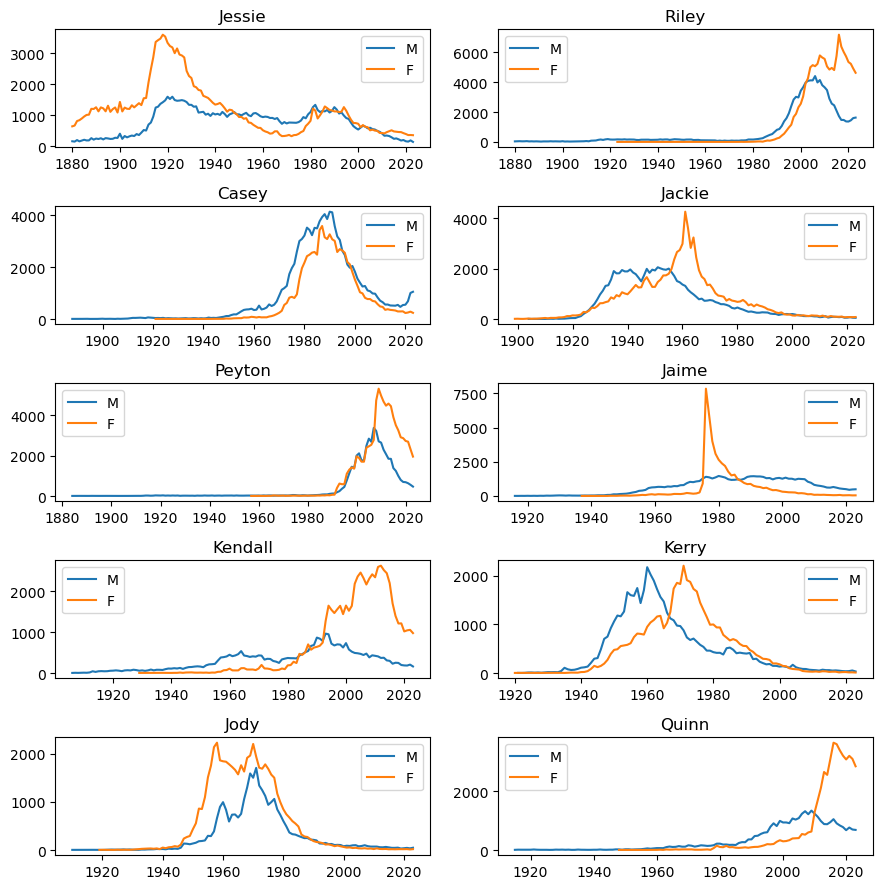

In [20]:
pp.figure(figsize=(9,9))

# loop over top-ten unisex names
for i, name in enumerate(common.index):
    pp.subplot(5,2,i+1)

    pp.plot(names_indexed.loc['M',name], label='M')
    pp.plot(names_indexed.loc['F',name], label='F')
    
    pp.legend()
    pp.title(name)

# improve subplot spacing
pp.tight_layout()